<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_modeling_forecasting/Logistic_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Logistic Regression From Scratch in Python

Logistic regression is the go-to linear classification algorithm for two-class problems.

It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has of your data are violated.

In this tutorial, you will discover how to implement logistic regression with stochastic gradient descent from scratch with Python.

In this script:

* How to make predictions with a logistic regression model.
* How to estimate coefficients using stochastic gradient descent.
* How to apply logistic regression to a real prediction problem.

## Description

This section will give a brief description of the logistic regression technique, stochastic gradient descent and the Pima Indians diabetes dataset we will use in this tutorial.



### Logistic Regression

Logistic regression is named for the function used at the core of the method, the logistic function.

Logistic regression uses an equation as the representation, very much like linear regression. Input values (X) are combined linearly using weights or coefficient values to predict an output value (y).

A key difference from linear regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.

```yhat = e^(b0 + b1 * x1) / (1 + e^(b0 + b1 * x1))```

This can be simplified as:

```yhat = 1.0 / (1.0 + e^(-(b0 + b1 * x1)))```

Where e is the base of the natural logarithms (Euler’s number), yhat is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x1).

The yhat prediction is a real value between 0 and 1, that needs to be rounded to an integer value and mapped to a predicted class value.

Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data. The actual representation of the model that you would store in memory or in a file are the coefficients in the equation (the beta value or b’s).

The coefficients of the logistic regression algorithm must be estimated from your training data.

### Stochastic Gradient Descent

Gradient Descent is the process of minimizing a function by following the gradients of the cost function.

This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data.

The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

This procedure can be used to find the set of coefficients in a model that result in the smallest error for the model on the training data. Each iteration, the coefficients (b) in machine learning language are updated using the equation:

```b = b + learning_rate * (y - yhat) * yhat * (1 - yhat) * x```

Where b is the coefficient or weight being optimized, learning_rate is a learning rate that you must configure (e.g. 0.01), (y – yhat) is the prediction error for the model on the training data attributed to the weight, yhat is the prediction made by the coefficients and x is the input value.


### Pima Indians Diabetes Dataset

The Pima Indians dataset involves predicting the onset of diabetes within 5 years in Pima Indians given basic medical details.

* Dataset File.
* Dataset Details.

It is a binary classification problem, where the prediction is either 0 (no diabetes) or 1 (diabetes).

It contains 768 rows and 9 columns. All of the values in the file are numeric, specifically floating point values. Below is a small sample of the first few rows of the problem.

```
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...
```



### Making Predictions

The first step is to develop a function that can make predictions.

This will be needed both in the evaluation of candidate coefficient values in stochastic gradient descent and after the model is finalized and we wish to start making predictions on test data or new data.

Below is a function named predict() that predicts an output value for a row given a set of coefficients.

The first coefficient in is always the intercept, also called the bias or b0 as it is standalone and not responsible for a specific input value.

```
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))
```

We can contrive a small dataset to test our predict() function.

```
X1		X2		Y
2.7810836	2.550537003	0
1.465489372	2.362125076	0
3.396561688	4.400293529	0
1.38807019	1.850220317	0
3.06407232	3.005305973	0
7.627531214	2.759262235	1
5.332441248	2.088626775	1
6.922596716	1.77106367	1
8.675418651	-0.242068655	1
7.673756466	3.508563011	1
```

Below is a plot of the dataset using different colors to show the different classes for each point.

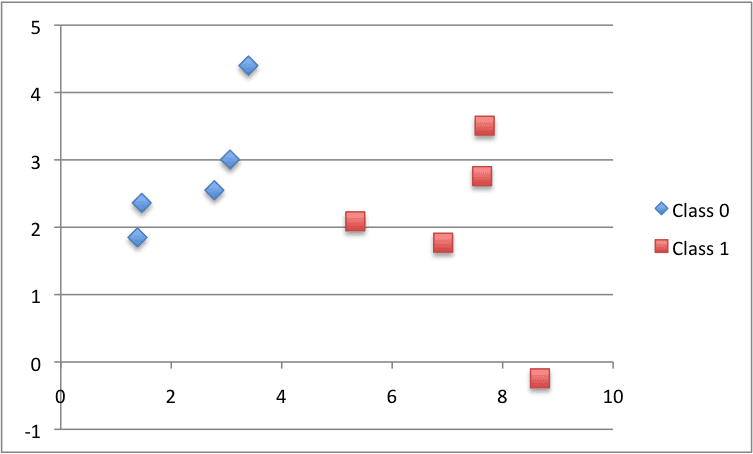

We can also use previously prepared coefficients to make predictions for this dataset.

Putting this all together we can test our predict() function below.

In [1]:
# Make a prediction
from math import exp

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
coef = [-0.406605464, 0.852573316, -1.104746259]
for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f [%d]" % (row[-1], yhat, round(yhat)))

Expected=0.000, Predicted=0.299 [0]
Expected=0.000, Predicted=0.146 [0]
Expected=0.000, Predicted=0.085 [0]
Expected=0.000, Predicted=0.220 [0]
Expected=0.000, Predicted=0.247 [0]
Expected=1.000, Predicted=0.955 [1]
Expected=1.000, Predicted=0.862 [1]
Expected=1.000, Predicted=0.972 [1]
Expected=1.000, Predicted=0.999 [1]
Expected=1.000, Predicted=0.905 [1]


There are two inputs values (X1 and X2) and three coefficient values (b0, b1 and b2). The prediction equation we have modeled for this problem is:

```y = 1.0 / (1.0 + e^(-(b0 + b1 * X1 + b2 * X2)))```

or, with the specific coefficient values we chose by hand as:

```y = 1.0 / (1.0 + e^(-(-0.406605464 + 0.852573316 * X1 + -1.104746259 * X2)))```

Running this function we get predictions that are reasonably close to the expected output (y) values and when rounded make correct predictions of the class.

```
Expected=0.000, Predicted=0.299 [0]
Expected=0.000, Predicted=0.146 [0]
Expected=0.000, Predicted=0.085 [0]
Expected=0.000, Predicted=0.220 [0]
Expected=0.000, Predicted=0.247 [0]
Expected=1.000, Predicted=0.955 [1]
Expected=1.000, Predicted=0.862 [1]
Expected=1.000, Predicted=0.972 [1]
Expected=1.000, Predicted=0.999 [1]
Expected=1.000, Predicted=0.905 [1]
```

Now we are ready to implement stochastic gradient descent to optimize our coefficient values.


### Estimating Coefficients

We can estimate the coefficient values for our training data using stochastic gradient descent.

Stochastic gradient descent requires two parameters:

* Learning Rate: Used to limit the amount each coefficient is corrected each time it is updated.
* Epochs: The number of times to run through the training data while updating the coefficients.

These, along with the training data will be the arguments to the function.

There are 3 loops we need to perform in the function:

1. Loop over each epoch.
2. Loop over each row in the training data for an epoch.
3. Loop over each coefficient and update it for a row in an epoch.

As you can see, we update each coefficient for each row in the training data, each epoch.

Coefficients are updated based on the error the model made. The error is calculated as the difference between the expected output value and the prediction made with the candidate coefficients.

There is one coefficient to weight each input attribute, and these are updated in a consistent way, for example:

```b1(t+1) = b1(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t)) * x1(t)```

The special coefficient at the beginning of the list, also called the intercept, is updated in a similar way, except without an input as it is not associated with a specific input value:

```b0(t+1) = b0(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t))```

Now we can put all of this together. Below is a function named coefficients_sgd() that calculates coefficient values for a training dataset using stochastic gradient descent.

```
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			sum_error += error**2
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef
```

You can see, that in addition, we keep track of the sum of the squared error (a positive value) each epoch so that we can print out a nice message each outer loop.

We can test this function on the same small contrived dataset from above.

```
from math import exp

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			sum_error += error**2
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef

# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.3
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)
```

We use a larger learning rate of 0.3 and train the model for 100 epochs, or 100 exposures of the coefficients to the entire training dataset.

Running the example prints a message each epoch with the sum squared error for that epoch and the final set of coefficients.

```
>epoch=95, lrate=0.300, error=0.023
>epoch=96, lrate=0.300, error=0.023
>epoch=97, lrate=0.300, error=0.023
>epoch=98, lrate=0.300, error=0.023
>epoch=99, lrate=0.300, error=0.022
[-0.8596443546618897, 1.5223825112460005, -2.218700210565016]
```

You can see how error continues to drop even in the final epoch. We could probably train for a lot longer (more epochs) or increase the amount we update the coefficients each epoch (higher learning rate).

Experiment and see what you come up with.

Now, let’s apply this algorithm on a real dataset.

### Diabetes Prediction

In this section, we will train a logistic regression model using stochastic gradient descent on the diabetes dataset.

The example assumes that a CSV copy of the dataset is in the current working directory with the filename pima-indians-diabetes.csv.

The dataset is first loaded, the string values converted to numeric and each column is normalized to values in the range of 0 to 1. This is achieved with the helper functions load_csv() and str_column_to_float() to load and prepare the dataset and dataset_minmax() and normalize_dataset() to normalize it.

We will use k-fold cross validation to estimate the performance of the learned model on unseen data. This means that we will construct and evaluate k models and estimate the performance as the mean model performance. Classification accuracy will be used to evaluate each model. These behaviors are provided in the cross_validation_split(), accuracy_metric() and evaluate_algorithm() helper functions.

We will use the predict(), coefficients_sgd() functions created above and a new logistic_regression() function to train the model.

Below is the complete example.

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# Logistic Regression on Diabetes Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
	return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
	predictions = list()
	coef = coefficients_sgd(train, l_rate, n_epoch)
	for row in test:
		yhat = predict(row, coef)
		yhat = round(yhat)
		predictions.append(yhat)
	return(predictions)

# Test the logistic regression algorithm on the diabetes dataset
seed(1)
# load and prepare data
filename = '/content/gdrive/My Drive/input_examples/pima-indians-diabetes.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.1
n_epoch = 100
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [73.8562091503268, 78.43137254901961, 81.69934640522875, 75.81699346405229, 75.81699346405229]
Mean Accuracy: 77.124%


A k value of 5 was used for cross-validation, giving each fold 768/5 = 153.6 or just over 150 records to be evaluated upon each iteration. A learning rate of 0.1 and 100 training epochs were chosen with a little experimentation.

You can try your own configurations and see if you can beat my score.

Running this example prints the scores for each of the 5 cross-validation folds, then prints the mean classification accuracy.

We can see that the accuracy is about 77%, higher than the baseline value of 65% if we just predicted the majority class using the Zero Rule Algorithm.

### Extensions

This section lists a number of extensions to this tutorial that you may wish to consider exploring.

* Tune The Example. Tune the learning rate, number of epochs and even data preparation method to get an improved score on the dataset.
* Batch Stochastic Gradient Descent. Change the stochastic gradient descent algorithm to accumulate updates across each epoch and only update the coefficients in a batch at the end of the epoch.
* Additional Classification Problems. Apply the technique to other binary (2 class) classification problems on the UCI machine learning repository.